# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yolanda Ester Berliana Ritonga
- **Email:** yolandaesterbrtg@gmail.com
- **ID Dicoding:** yolandaesterbr

## Menentukan Pertanyaan Bisnis

- Pada jam berapa sepeda paling sering digunakan dalam sehari?
- Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda?
- Bagaimana pola trafik sepeda di sepanjang hari berdasarkan tingkat kepadatan lalu lintas?

## Import Semua Packages/Library yang Digunakan

In [52]:
!pip install opendatasets

In [53]:
import opendatasets as od
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [54]:
od.download('https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset')

Skipping, found downloaded files in "./bike-sharing-dataset" (use force=True to force download)


In [55]:
directory_contents = os.listdir('/content/bike-sharing-dataset')
print(directory_contents)

['day.csv', 'Readme.txt', 'hour.csv']


Dapat dilihat pada dataset bike terdapat 3 file yaitu day.csv, hour.csv, dan Readme.txt

**1. Gathering Data**

read file Readme.txt

In [56]:
with open('/content/bike-sharing-dataset/Readme.txt', 'r') as file:
    print(file.read())

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

load day.csv

In [57]:
day_df = pd.read_csv('/content/bike-sharing-dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


load hour.csv

In [58]:
hour_df = pd.read_csv('/content/bike-sharing-dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**2. Assessing Data**

Menilai data day_df

In [59]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [60]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [61]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [62]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


dapat dilihat pada day_df tidak ada missing value dan juga tidak ada data yang terduplikat

Menilai data hour_df

In [63]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [64]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [65]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [66]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


pada hour_df juga kita dapat melihat bahwa data bersih, tidak ada missing value dan data yang terduplikat

**3. Cleaning Data**

Karena data sudah bersih, maka di tahap cleaning data kita cukup hanya mengubah tipe kolom 'dteday' menjadi 'datetime' beserta melakukan stadardisasi nama kolom

Mengubah tipe data kolom 'dteday' menjadi datetime

In [67]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Untuk memastikan sudah terganti apa tidak, gunakan method info()

In [68]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Melakukan standardisasi nama kolom

In [69]:
day_df.rename(columns={'instant': 'instant_id', 'dteday': 'date'}, inplace=True)
hour_df.rename(columns={'instant': 'instant_id', 'dteday': 'date'}, inplace=True)

menggunakan metode rename() dari pandas DataFrame untuk mengganti nama kolom yang ada dengan nama baru

## Exploratory Data Analysis (EDA)

### Explore day_df

In [70]:
day_df.describe(include="all", datetime_is_numeric=True)

,instant_id,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


### Explore hour_df

In [71]:
hour_df.describe(include="all", datetime_is_numeric=True)

,instant_id,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


### Explore all_df

Perlu dibuat DataFrame baru bernama all_df untuk menampung semua informasi.

In [72]:
all_df = pd.concat([day_df, hour_df])

In [73]:
print("Informasi tentang DataFrame baru (all_df):")
print(all_df.info())

Informasi tentang DataFrame baru (all_df):
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18110 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant_id  18110 non-null  int64         
 1   date        18110 non-null  datetime64[ns]
 2   season      18110 non-null  int64         
 3   yr          18110 non-null  int64         
 4   mnth        18110 non-null  int64         
 5   holiday     18110 non-null  int64         
 6   weekday     18110 non-null  int64         
 7   workingday  18110 non-null  int64         
 8   weathersit  18110 non-null  int64         
 9   temp        18110 non-null  float64       
 10  atemp       18110 non-null  float64       
 11  hum         18110 non-null  float64       
 12  windspeed   18110 non-null  float64       
 13  casual      18110 non-null  int64         
 14  registered  18110 non-null  int64         
 15  cnt         18110 non-null 

In [74]:
print("\nBeberapa data pertama dari DataFrame baru (all_df):")
print(all_df.head())


Beberapa data pertama dari DataFrame baru (all_df):
   instant_id       date  season  yr  mnth  holiday  weekday  workingday  \
0           1 2011-01-01       1   0     1        0        6           0   
1           2 2011-01-02       1   0     1        0        0           0   
2           3 2011-01-03       1   0     1        0        1           1   
3           4 2011-01-04       1   0     1        0        2           1   
4           5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  hr  
0   985

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada jam berapa sepeda paling sering digunakan dalam sehari?

In [75]:
hourly_usage = all_df.groupby('hr')['cnt'].mean()

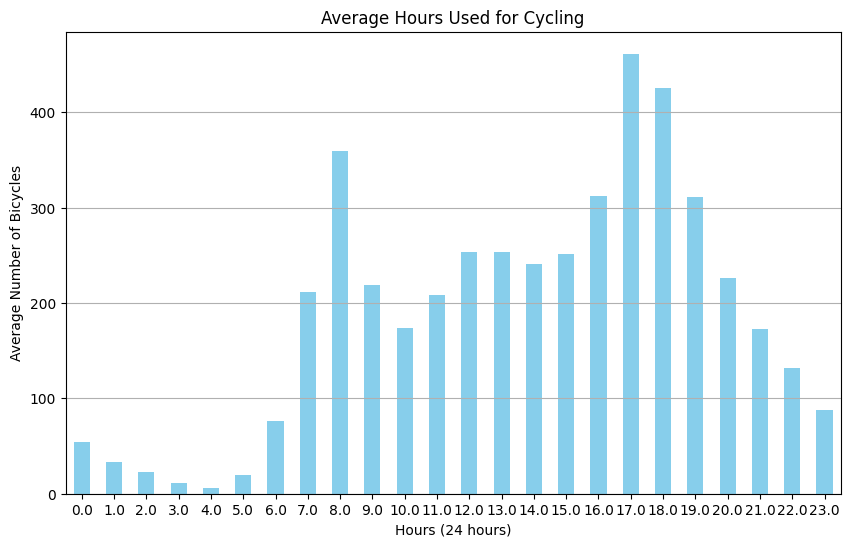

In [76]:
plt.figure(figsize=(10, 6))
hourly_usage.plot(kind='bar', color='skyblue')
plt.title('Average Hours Used for Cycling')
plt.xlabel('Hours (24 hours)')
plt.ylabel('Average Number of Bicycles')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Dari visualisasi dalam bentuk bar diatas dapat kita peroleh bahwa banyak orang yang menggunakan sepeda setiap harinya pada sore hari, seperti pada peringkat pertama yaitu pada jam 5 sore, peringkat kedua pada jam 6 sore, dan peringkat ketiga pada jam 8 pagi. Pada visualisasi bar tersebut juga dapat dilihan bahwa pada jam-jam malam sampai subuh, penggunaan bersepeda dibawah 100 yang menandakan cuman segelintir orang yang menggunakan sepeda pada jam tersebut.

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda?

In [77]:
weather_effect = all_df.groupby('weathersit')['cnt'].mean()

In [78]:
weather_labels = {1: 'Clear', 2: 'Misty', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}

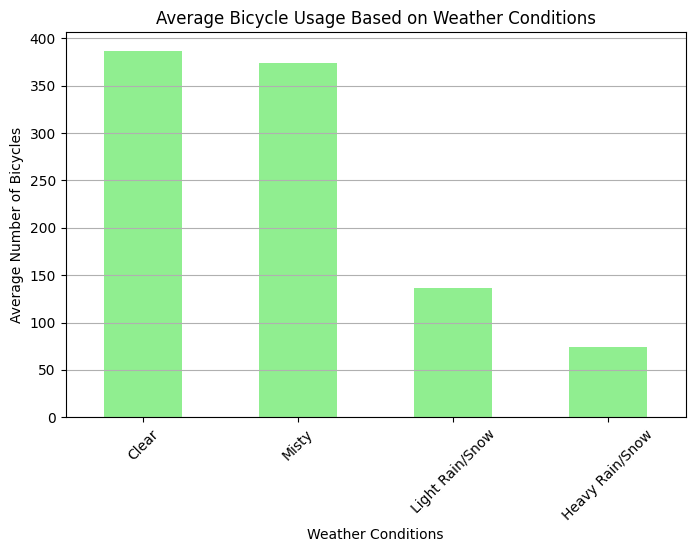

In [79]:
plt.figure(figsize=(8, 5))
weather_effect.rename(index=weather_labels).plot(kind='bar', color='lightgreen')
plt.title('Average Bicycle Usage Based on Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Average Number of Bicycles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Pada bar visualisasi diatas dapat dilihat seberapa pengaruh kondisi cuaca untuk menggunakan sepeda untuk keluar. Dapat dilihat banyak orang yang menggunakan sepeda saat kondisi cuaca cerah, lalu diikuti berawan, hujan ringan, dan posisi terakhir yaitu hujan lebat.

### Pertanyaan 3: Bagaimana pola trafik sepeda di sepanjang hari berdasarkan tingkat kepadatan lalu lintas?

Untuk menjawab pertanyaan diatas, saya menggunakan teknik analisis lanjutan yaitu *clustering* tanpa menggunakan algoritma machine learning

In [80]:
def categorize_traffic_density(cnt):
    if cnt < 50:
        return 'Sepi'
    elif 50 <= cnt < 200:
        return 'Sedang'
    else:
        return 'Ramai'

In [81]:
all_df['traffic_density'] = all_df['cnt'].apply(categorize_traffic_density)

In [82]:
print(all_df.head())

   instant_id       date  season  yr  mnth  holiday  weekday  workingday  \
0           1 2011-01-01       1   0     1        0        6           0   
1           2 2011-01-02       1   0     1        0        0           0   
2           3 2011-01-03       1   0     1        0        1           1   
3           4 2011-01-04       1   0     1        0        2           1   
4           5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  hr traffic_density  
0   985 NaN           Ramai  
1   801 NaN   

Setelah mengelompokkannya ke dalam tiga clusster, maka kita akan membuat tampilan visualisasi nya agar diidentifikasi/analisis lebih lanjut

In [83]:
traffic_density_counts = all_df['traffic_density'].value_counts()

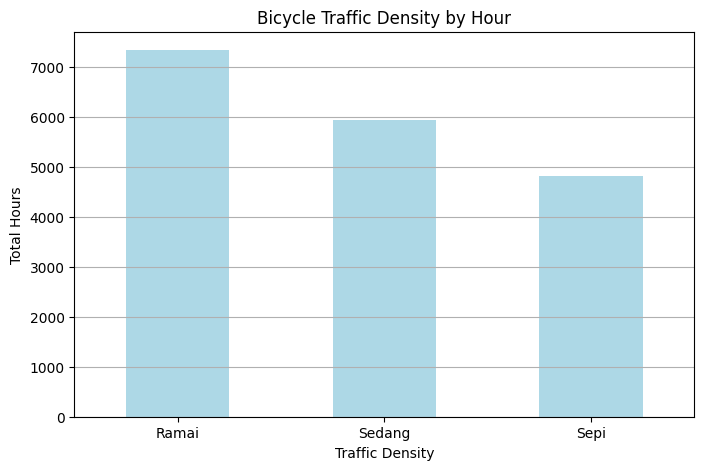

In [84]:
plt.figure(figsize=(8, 5))
traffic_density_counts.plot(kind='bar', color='lightblue')
plt.title('Bicycle Traffic Density by Hour')
plt.xlabel('Traffic Density')
plt.ylabel('Total Hours')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Pada visualisasi bar diatas dapat kita ketahui bahwa tingkat kepadatan lalu lintas "Ramai" lebih dari 7000 jam, menunjukkan bahwa pada jam-jam tertentu ada banyak sepeda yang melintas yang mungkin terjadi selama jam sibuk seperti jam berangkan dan pulang kerja.

Tingkat kepadatan lalu lintas "Sedang" dari 5000 hingga 6000 jam menunjukkan bahwa meskipun tidak sebanyak pada jam-jam ramai, ada cukup banyak sepeda yang melintas selama periode waktu ini, yang mungkin mencakup jam-jam di luar jam sibuk.

Tingkat kepadatan lalu lintas "Sepi" dari 4000 hingga 5000 jam menunjukkan bahwa ada sedikit sepeda yang melintas selama periode waktu ini, yang mungkin terjadi pada jam-jam malam atau dini hari.

## Conclusion

- Conclution pertanyaan 1 : Dari visualisasi, kita dapat menyimpulkan bahwa sepeda paling sering digunakan pada sore hari, khususnya pada jam 5 sore, diikuti oleh jam 6 sore, dan jam 8 pagi. Penggunaan sepeda cenderung rendah pada jam-jam malam sampai subuh. Hal ini menunjukkan bahwa mayoritas orang lebih memilih untuk menggunakan sepeda pada jam-jam tertentu dalam sehari, dengan puncak penggunaan terjadi pada sore hari.

- Conclution pertanyaan 2 : Dari visualisasi, terlihat bahwa kondisi cuaca memengaruhi jumlah pengguna sepeda. Saat cuaca cerah, penggunaan sepeda cenderung tinggi, diikuti oleh cuaca berawan dan hujan ringan. Namun, saat hujan lebat, penggunaan sepeda menurun secara signifikan. Hal ini menunjukkan bahwa mayoritas orang lebih memilih untuk menggunakan sepeda saat cuaca baik atau sebagian berawan, dan mengurangi penggunaan saat kondisi cuaca buruk seperti hujan lebat.

- Conclusion pertanyaan 3 :
Berdasarkan analisis terhadap pola trafik sepeda sepanjang hari, terdapat tiga tingkat kepadatan lalu lintas yang dapat dibedakan. Pada jam-jam ramai, terjadi lebih dari 7000 jam di mana jumlah sepeda yang melintas mencapai puncaknya, khususnya selama jam sibuk seperti jam berangkat dan pulang kerja. Sementara itu, pada tingkat kepadatan lalu lintas sedang, terdapat antara 5000 hingga 6000 jam yang mencakup periode waktu di luar jam sibuk. Di sisi lain, pada jam-jam sepi, antara 4000 hingga 5000 jam, terjadi sedikit sepeda yang melintas, mungkin terutama pada jam-jam malam atau dini hari. Kesimpulan ini memberikan gambaran yang komprehensif tentang dinamika penggunaan sepeda sepanjang hari.

**KESIMPULAN RANGKUMAN KESELURUHAN :**


Secara keseluruhan, analisis data menunjukkan bahwa penggunaan sepeda dipengaruhi oleh faktor waktu dalam sehari, kondisi cuaca, dan tingkat kepadatan lalu lintas. Pada pertanyaan pertama, ditemukan bahwa sepeda paling sering digunakan pada sore hari, menunjukkan adanya pola tertentu dalam penggunaan sepeda sepanjang hari. Pada pertanyaan kedua, kondisi cuaca terbukti memengaruhi jumlah pengguna sepeda, dengan cuaca cerah dan berawan mendukung penggunaan sepeda yang lebih tinggi daripada saat hujan lebat. Terakhir, pada pertanyaan ketiga, analisis pola trafik sepeda menunjukkan bahwa terdapat tiga tingkat kepadatan lalu lintas, yaitu ramai, sedang, dan sepi, yang mewakili beragam situasi penggunaan sepeda dalam sehari. Kesimpulan ini memberikan gambaran yang holistik tentang faktor-faktor yang memengaruhi penggunaan sepeda serta dinamika lalu lintas sepeda secara keseluruhan.

In [85]:
all_df.to_csv("all_data_bike.csv", index=False)